In [ ]:
import pandas as pd
import numpy as np
import io
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving arrhythmia.data to arrhythmia.data
Saving ‎Datapreprocessing.csv to ‎Datapreprocessing.csv
Saving Ecommerce Customers.csv to Ecommerce Customers.csv


In [ ]:
dpp_df = pd.read_csv('/content/‎Datapreprocessing.csv')

# **Data Preprocessing**

In [ ]:
dpp_df

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,B,59324
1,Switzerland,CHE,1.077221,8.372098e+06,39516.0,B,29061
2,Germany,DEU,1.193867,8.266768e+07,348900.0,A,156727
3,Denmark,DNK,0.834638,NaN,42262.0,B,8575
4,Spain,ESP,-0.008048,4.644396e+07,500210.0,A,223759
5,France,FRA,0.407491,6.689611e+07,547557.0,A,161488
6,Japan,JPN,-0.115284,1.269945e+08,364560.0,B,13231
7,Greece,GRC,-0.687543,1.074674e+07,128900.0,C,2506
8,Iran,IRN,1.148789,8.027743e+07,1628760.0,D,90481
9,Kuwait,KWT,2.924206,4.052584e+06,NaN,C,3075


## Missing Values

In [ ]:
dpp_df.isnull().sum()

 CountryName              0
CountryCode               0
Population growth         2
Total population          1
Area (sq. km)             1
International Visitors    0
Coronavirus Cases         0
dtype: int64

### Backward Filling

In [ ]:
dpp_df.fillna(axis=0, method='bfill')

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,B,59324
1,Switzerland,CHE,1.077221,8.372098e+06,39516.0,B,29061
2,Germany,DEU,1.193867,8.266768e+07,348900.0,A,156727
3,Denmark,DNK,0.834638,4.644396e+07,42262.0,B,8575
4,Spain,ESP,-0.008048,4.644396e+07,500210.0,A,223759
5,France,FRA,0.407491,6.689611e+07,547557.0,A,161488
6,Japan,JPN,-0.115284,1.269945e+08,364560.0,B,13231
7,Greece,GRC,-0.687543,1.074674e+07,128900.0,C,2506
8,Iran,IRN,1.148789,8.027743e+07,1628760.0,D,90481
9,Kuwait,KWT,2.924206,4.052584e+06,446300.0,C,3075


### Forward Filling

In [ ]:
dpp_df.fillna(axis=0, method='ffill')

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,B,59324
1,Switzerland,CHE,1.077221,8.372098e+06,39516.0,B,29061
2,Germany,DEU,1.193867,8.266768e+07,348900.0,A,156727
3,Denmark,DNK,0.834638,8.266768e+07,42262.0,B,8575
4,Spain,ESP,-0.008048,4.644396e+07,500210.0,A,223759
5,France,FRA,0.407491,6.689611e+07,547557.0,A,161488
6,Japan,JPN,-0.115284,1.269945e+08,364560.0,B,13231
7,Greece,GRC,-0.687543,1.074674e+07,128900.0,C,2506
8,Iran,IRN,1.148789,8.027743e+07,1628760.0,D,90481
9,Kuwait,KWT,2.924206,4.052584e+06,1628760.0,C,3075


### Padding

In [ ]:
dpp_df.fillna(axis=0, method='pad')

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,B,59324
1,Switzerland,CHE,1.077221,8.372098e+06,39516.0,B,29061
2,Germany,DEU,1.193867,8.266768e+07,348900.0,A,156727
3,Denmark,DNK,0.834638,8.266768e+07,42262.0,B,8575
4,Spain,ESP,-0.008048,4.644396e+07,500210.0,A,223759
5,France,FRA,0.407491,6.689611e+07,547557.0,A,161488
6,Japan,JPN,-0.115284,1.269945e+08,364560.0,B,13231
7,Greece,GRC,-0.687543,1.074674e+07,128900.0,C,2506
8,Iran,IRN,1.148789,8.027743e+07,1628760.0,D,90481
9,Kuwait,KWT,2.924206,4.052584e+06,1628760.0,C,3075


### Mean Replacement

#### Method *I*.

In [ ]:
mean_df = dpp_df
mean_df['Area (sq. km)'] = mean_df['Area (sq. km)'].fillna(value=mean_df['Area (sq. km)'].mean())
mean_df['Population growth'] = mean_df['Population growth'].fillna(value=mean_df['Population growth'].mean())
mean_df['Total population'] = mean_df['Total population'].fillna(value=mean_df['Total population'].mean())
mean_df

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,B,59324
1,Switzerland,CHE,1.077221,8.372098e+06,39516.0,B,29061
2,Germany,DEU,1.193867,8.266768e+07,348900.0,A,156727
3,Denmark,DNK,0.834638,1.565725e+08,42262.0,B,8575
4,Spain,ESP,-0.008048,4.644396e+07,500210.0,A,223759
5,France,FRA,0.407491,6.689611e+07,547557.0,A,161488
6,Japan,JPN,-0.115284,1.269945e+08,364560.0,B,13231
7,Greece,GRC,-0.687543,1.074674e+07,128900.0,C,2506
8,Iran,IRN,1.148789,8.027743e+07,1628760.0,D,90481
9,Kuwait,KWT,2.924206,4.052584e+06,1193427.5,C,3075


#### Method *II*.

In [ ]:
X = dpp_df.iloc[:,0:6]
X

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,B
1,Switzerland,CHE,1.077221,8.372098e+06,39516.0,B
2,Germany,DEU,1.193867,8.266768e+07,348900.0,A
3,Denmark,DNK,0.834638,1.565725e+08,42262.0,B
4,Spain,ESP,-0.008048,4.644396e+07,500210.0,A
5,France,FRA,0.407491,6.689611e+07,547557.0,A
6,Japan,JPN,-0.115284,1.269945e+08,364560.0,B
7,Greece,GRC,-0.687543,1.074674e+07,128900.0,C
8,Iran,IRN,1.148789,8.027743e+07,1628760.0,D
9,Kuwait,KWT,2.924206,4.052584e+06,1193427.5,C


In [ ]:
y = dpp_df.iloc[:,-1]
y

0      59324
1      29061
2     156727
3       8575
4     223759
5     161488
6      13231
7       2506
8      90481
9       3075
10      4047
11      1182
12     10287
13     18640
14     26917
Name: Coronavirus Cases, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

In [ ]:
X.iloc[:,2:5] = imputer.fit_transform(X.iloc[:,2:5])
X

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,B
1,Switzerland,CHE,1.077221,8.372098e+06,39516.0,B
2,Germany,DEU,1.193867,8.266768e+07,348900.0,A
3,Denmark,DNK,0.834638,1.565725e+08,42262.0,B
4,Spain,ESP,-0.008048,4.644396e+07,500210.0,A
5,France,FRA,0.407491,6.689611e+07,547557.0,A
6,Japan,JPN,-0.115284,1.269945e+08,364560.0,B
7,Greece,GRC,-0.687543,1.074674e+07,128900.0,C
8,Iran,IRN,1.148789,8.027743e+07,1628760.0,D
9,Kuwait,KWT,2.924206,4.052584e+06,1193427.5,C


Applying changes to the main data.

In [ ]:
dpp_df.iloc[:,2:5] = X.iloc[:,2:5]
dpp_df

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,B,59324
1,Switzerland,CHE,1.077221,8.372098e+06,39516.0,B,29061
2,Germany,DEU,1.193867,8.266768e+07,348900.0,A,156727
3,Denmark,DNK,0.834638,1.565725e+08,42262.0,B,8575
4,Spain,ESP,-0.008048,4.644396e+07,500210.0,A,223759
5,France,FRA,0.407491,6.689611e+07,547557.0,A,161488
6,Japan,JPN,-0.115284,1.269945e+08,364560.0,B,13231
7,Greece,GRC,-0.687543,1.074674e+07,128900.0,C,2506
8,Iran,IRN,1.148789,8.027743e+07,1628760.0,D,90481
9,Kuwait,KWT,2.924206,4.052584e+06,1193427.5,C,3075


### Manual Replacement

Since ***Kuwait*** is a small country, it would be irrational to replace its surface area with something other than its original value. Therefore, we replace it manually.

In [ ]:
dpp_df['Area (sq. km)'][9] = 17818
dpp_df

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,B,59324
1,Switzerland,CHE,1.077221,8.372098e+06,39516.0,B,29061
2,Germany,DEU,1.193867,8.266768e+07,348900.0,A,156727
3,Denmark,DNK,0.834638,1.565725e+08,42262.0,B,8575
4,Spain,ESP,-0.008048,4.644396e+07,500210.0,A,223759
5,France,FRA,0.407491,6.689611e+07,547557.0,A,161488
6,Japan,JPN,-0.115284,1.269945e+08,364560.0,B,13231
7,Greece,GRC,-0.687543,1.074674e+07,128900.0,C,2506
8,Iran,IRN,1.148789,8.027743e+07,1628760.0,D,90481
9,Kuwait,KWT,2.924206,4.052584e+06,17818.0,C,3075


We'll do the same for other parameters.

In [ ]:
dpp_df['Population growth'][10] = 1.3
dpp_df['Population growth'][13] = 1.2
dpp_df

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,B,59324
1,Switzerland,CHE,1.077221,8.372098e+06,39516.0,B,29061
2,Germany,DEU,1.193867,8.266768e+07,348900.0,A,156727
3,Denmark,DNK,0.834638,1.565725e+08,42262.0,B,8575
4,Spain,ESP,-0.008048,4.644396e+07,500210.0,A,223759
5,France,FRA,0.407491,6.689611e+07,547557.0,A,161488
6,Japan,JPN,-0.115284,1.269945e+08,364560.0,B,13231
7,Greece,GRC,-0.687543,1.074674e+07,128900.0,C,2506
8,Iran,IRN,1.148789,8.027743e+07,1628760.0,D,90481
9,Kuwait,KWT,2.924206,4.052584e+06,17818.0,C,3075


In [ ]:
dpp_df['Total population'][3] = 5.806 * np.power(10, 6)
dpp_df

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,B,59324
1,Switzerland,CHE,1.077221,8.372098e+06,39516.0,B,29061
2,Germany,DEU,1.193867,8.266768e+07,348900.0,A,156727
3,Denmark,DNK,0.834638,5.806000e+06,42262.0,B,8575
4,Spain,ESP,-0.008048,4.644396e+07,500210.0,A,223759
5,France,FRA,0.407491,6.689611e+07,547557.0,A,161488
6,Japan,JPN,-0.115284,1.269945e+08,364560.0,B,13231
7,Greece,GRC,-0.687543,1.074674e+07,128900.0,C,2506
8,Iran,IRN,1.148789,8.027743e+07,1628760.0,D,90481
9,Kuwait,KWT,2.924206,4.052584e+06,17818.0,C,3075


### Conclusions

Based on the results above, we can conclude that it is in our best interest to fill the missing values with the ***mean*** of the corresponding variable; Therefore, it is better do so as it doesn't cause a significant changes to the other parameters regarding that single variable.

However, it is worth mentioning that we have a small set of data, it is better to simply fill the missing values with the actual value of that parameter *(if available)*. The example of this method has also been explained above. (***Kuwait***)

Thus, this approach has been selected for this context since there are only $4$ missing values.

## Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label = LabelEncoder()
one_hot = OneHotEncoder()

In [ ]:
label_test = dpp_df

In [ ]:
label_test['International Visitors'] = label.fit_transform(label_test['International Visitors'])
label_test

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,1,59324
1,Switzerland,CHE,1.077221,8.372098e+06,39516.0,1,29061
2,Germany,DEU,1.193867,8.266768e+07,348900.0,0,156727
3,Denmark,DNK,0.834638,5.806000e+06,42262.0,1,8575
4,Spain,ESP,-0.008048,4.644396e+07,500210.0,0,223759
5,France,FRA,0.407491,6.689611e+07,547557.0,0,161488
6,Japan,JPN,-0.115284,1.269945e+08,364560.0,1,13231
7,Greece,GRC,-0.687543,1.074674e+07,128900.0,2,2506
8,Iran,IRN,1.148789,8.027743e+07,1628760.0,3,90481
9,Kuwait,KWT,2.924206,4.052584e+06,17818.0,2,3075


In [ ]:
one_hot_test = pd.DataFrame(one_hot.fit_transform(dpp_df[['International Visitors']]).toarray())

In [ ]:
one_hot_test = one_hot_test.join(dpp_df)
one_hot_test

,0,1,2,3,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,0.0,1.0,0.0,0.0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,1,59324
1,0.0,1.0,0.0,0.0,Switzerland,CHE,1.077221,8.372098e+06,39516.0,1,29061
2,1.0,0.0,0.0,0.0,Germany,DEU,1.193867,8.266768e+07,348900.0,0,156727
3,0.0,1.0,0.0,0.0,Denmark,DNK,0.834638,5.806000e+06,42262.0,1,8575
4,1.0,0.0,0.0,0.0,Spain,ESP,-0.008048,4.644396e+07,500210.0,0,223759
5,1.0,0.0,0.0,0.0,France,FRA,0.407491,6.689611e+07,547557.0,0,161488
6,0.0,1.0,0.0,0.0,Japan,JPN,-0.115284,1.269945e+08,364560.0,1,13231
7,0.0,0.0,1.0,0.0,Greece,GRC,-0.687543,1.074674e+07,128900.0,2,2506
8,0.0,0.0,0.0,1.0,Iran,IRN,1.148789,8.027743e+07,1628760.0,3,90481
9,0.0,0.0,1.0,0.0,Kuwait,KWT,2.924206,4.052584e+06,17818.0,2,3075


In [ ]:
dpp_df['International Visitors'] = 1 + label.fit_transform(dpp_df['International Visitors'])
dpp_df

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0,2,59324
1,Switzerland,CHE,1.077221,8.372098e+06,39516.0,2,29061
2,Germany,DEU,1.193867,8.266768e+07,348900.0,1,156727
3,Denmark,DNK,0.834638,5.806000e+06,42262.0,2,8575
4,Spain,ESP,-0.008048,4.644396e+07,500210.0,1,223759
5,France,FRA,0.407491,6.689611e+07,547557.0,1,161488
6,Japan,JPN,-0.115284,1.269945e+08,364560.0,2,13231
7,Greece,GRC,-0.687543,1.074674e+07,128900.0,3,2506
8,Iran,IRN,1.148789,8.027743e+07,1628760.0,4,90481
9,Kuwait,KWT,2.924206,4.052584e+06,17818.0,3,3075


## Feature Scaling

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
X_scaled = pd.DataFrame(scale(dpp_df.iloc[:,2:5]), columns=['Population growth', 'Total Population', 'Area (sq. km)'])
X_scaled

,Population growth,Total Population,Area (sq. km)
0,-0.310602,0.190372,3.486965
1,-0.073010,-0.430215,-0.517785
2,0.033720,-0.198849,-0.368841
3,-0.294972,-0.438207,-0.516463
4,-1.066024,-0.311655,-0.295998
5,-0.685809,-0.247964,-0.273204
6,-1.164145,-0.060809,-0.361302
7,-1.687757,-0.422821,-0.474754
8,-0.007526,-0.206293,0.247308
9,1.616969,-0.443667,-0.528231


Applying changes to the main data.

In [ ]:
dpp_df['Population growth'] = X_scaled['Population growth']
dpp_df['Area (sq. km)'] = X_scaled['Area (sq. km)']
dpp_df['Total population'] = X_scaled['Total Population']
dpp_df

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,-0.310602,0.190372,3.486965,2,59324
1,Switzerland,CHE,-0.073010,-0.430215,-0.517785,2,29061
2,Germany,DEU,0.033720,-0.198849,-0.368841,1,156727
3,Denmark,DNK,-0.294972,-0.438207,-0.516463,2,8575
4,Spain,ESP,-1.066024,-0.311655,-0.295998,1,223759
5,France,FRA,-0.685809,-0.247964,-0.273204,1,161488
6,Japan,JPN,-1.164145,-0.060809,-0.361302,2,13231
7,Greece,GRC,-1.687757,-0.422821,-0.474754,3,2506
8,Iran,IRN,-0.007526,-0.206293,0.247308,4,90481
9,Kuwait,KWT,1.616969,-0.443667,-0.528231,3,3075


## Outliers

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

### BoxPlot

#### Coronavirus Cases

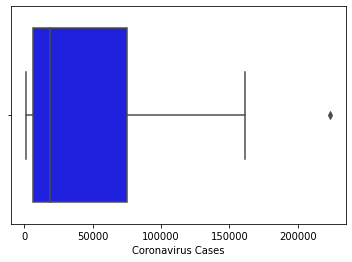

In [ ]:
sb.boxplot(x=dpp_df['Coronavirus Cases'], color='blue');

#### Area (sq. km)

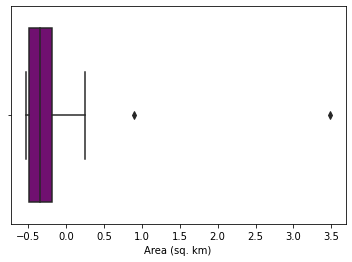

In [ ]:
sb.boxplot(x=dpp_df['Area (sq. km)'], color='purple');

#### Population growth

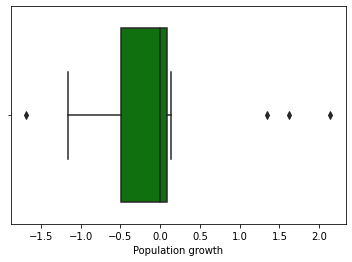

In [ ]:
sb.boxplot(x=dpp_df['Population growth'], color='green');

### ScatterPlot

$x$ = Total Population

$y$ = Coronavirus Cases

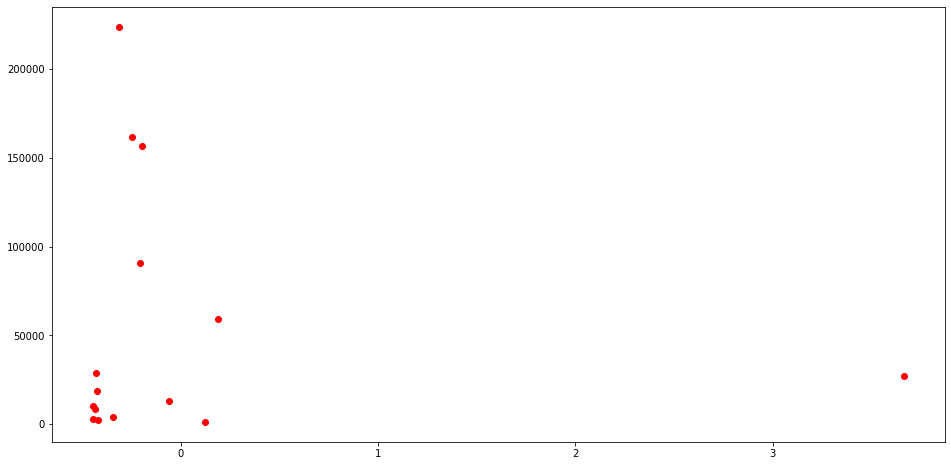

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dpp_df['Total population'], dpp_df['Coronavirus Cases'], color='red');

---
$x$ = International Visitors

$y$ = Coronavirus Cases

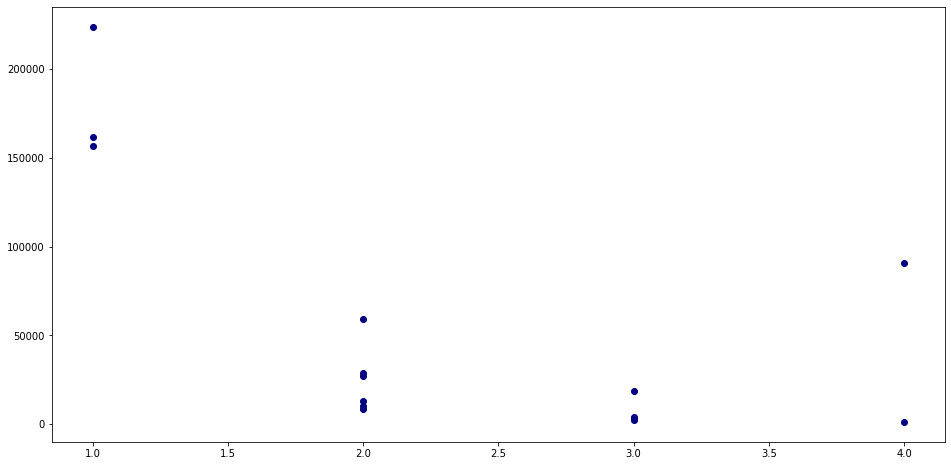

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dpp_df['International Visitors'], dpp_df['Coronavirus Cases'], color='navy');

### Qunatile Analysis

In [ ]:
Q1 = dpp_df.quantile(0.25)
Q3 = dpp_df.quantile(0.75)
IQR = Q3 - Q1
IQR

Population growth             0.583287
Total population              0.298002
Area (sq. km)                 0.309833
International Visitors        1.000000
Coronavirus Cases         68591.500000
dtype: float64

In the following table, `True` indicates whether that datum is an outlier or not.

In [ ]:
outlier_recognizer = (dpp_df < Q1 - 1.5 * IQR) | (dpp_df > Q3 + 1.5 * IQR)
outlier_recognizer

,CountryName,Area (sq. km),Coronavirus Cases,CountryCode,International Visitors,Population growth,Total population
0,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False


Removing outliers from the main data.

In [ ]:
indices = []
for i in outlier_recognizer.columns:
  for j in range(outlier_recognizer.shape[0]):
    if outlier_recognizer[i][j]:
      indices.append(j)
indices = np.unique(indices)
dpp_df.drop(index=indices)

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
1,Switzerland,CHE,-0.073010,-0.430215,-0.517785,2,29061
2,Germany,DEU,0.033720,-0.198849,-0.368841,1,156727
3,Denmark,DNK,-0.294972,-0.438207,-0.516463,2,8575
5,France,FRA,-0.685809,-0.247964,-0.273204,1,161488
6,Japan,JPN,-1.164145,-0.060809,-0.361302,2,13231
8,Iran,IRN,-0.007526,-0.206293,0.247308,4,90481
10,Morocco,MAR,0.130831,-0.346431,-0.321951,3,4047
13,Sweden,SWE,0.039332,-0.425448,-0.340722,3,18640


It's NOT a good idea remove outlier entries since they still contain lots of useful information.

It would be in our best interest to replace the outlier values with the ***median*** values of the data.

Masking the outlier values with *NaN*. This enables us to calculate the ***median*** of data without the intervention of outlier values.

In [ ]:
for col in outlier_recognizer.columns:
  for row in range(outlier_recognizer.shape[0]):
    if outlier_recognizer[col][row]:
      dpp_df[col][row] = np.nan
dpp_df

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,-0.310602,0.190372,NaN,2,59324.0
1,Switzerland,CHE,-0.073010,-0.430215,-0.517785,2,29061.0
2,Germany,DEU,0.033720,-0.198849,-0.368841,1,156727.0
3,Denmark,DNK,-0.294972,-0.438207,-0.516463,2,8575.0
4,Spain,ESP,-1.066024,-0.311655,-0.295998,1,NaN
5,France,FRA,-0.685809,-0.247964,-0.273204,1,161488.0
6,Japan,JPN,-1.164145,-0.060809,-0.361302,2,13231.0
7,Greece,GRC,NaN,-0.422821,-0.474754,3,2506.0
8,Iran,IRN,-0.007526,-0.206293,0.247308,4,90481.0
9,Kuwait,KWT,NaN,-0.443667,-0.528231,3,3075.0


Replacing *NaN*s with their respective ***median*** values.

In [ ]:
for col in outlier_recognizer.columns:
  for row in range(outlier_recognizer.shape[0]):
    if outlier_recognizer[col][row]:
      dpp_df[col][row] = float(dpp_df[col].median())
dpp_df

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
0,Brazil,BRA,-0.310602,0.190372,-0.361302,2,59324.0
1,Switzerland,CHE,-0.073010,-0.430215,-0.517785,2,29061.0
2,Germany,DEU,0.033720,-0.198849,-0.368841,1,156727.0
3,Denmark,DNK,-0.294972,-0.438207,-0.516463,2,8575.0
4,Spain,ESP,-1.066024,-0.311655,-0.295998,1,15935.5
5,France,FRA,-0.685809,-0.247964,-0.273204,1,161488.0
6,Japan,JPN,-1.164145,-0.060809,-0.361302,2,13231.0
7,Greece,GRC,-0.073010,-0.422821,-0.474754,3,2506.0
8,Iran,IRN,-0.007526,-0.206293,0.247308,4,90481.0
9,Kuwait,KWT,-0.073010,-0.443667,-0.528231,3,3075.0


## Regression

In [ ]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

In [ ]:
X = dpp_df.iloc[:,2:-1]
X

,Population growth,Total population,Area (sq. km),International Visitors
0,-0.310602,0.190372,-0.361302,2
1,-0.073010,-0.430215,-0.517785,2
2,0.033720,-0.198849,-0.368841,1
3,-0.294972,-0.438207,-0.516463,2
4,-1.066024,-0.311655,-0.295998,1
5,-0.685809,-0.247964,-0.273204,1
6,-1.164145,-0.060809,-0.361302,2
7,-0.073010,-0.422821,-0.474754,3
8,-0.007526,-0.206293,0.247308,4
9,-0.073010,-0.443667,-0.528231,3


In [ ]:
y = pd.DataFrame(dpp_df.iloc[:,-1])
y

,Coronavirus Cases
0,59324.0
1,29061.0
2,156727.0
3,8575.0
4,15935.5
5,161488.0
6,13231.0
7,2506.0
8,90481.0
9,3075.0


Creating the polynomial model.

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float)).fit()

In [ ]:
prediction = model.predict(X)

In [ ]:
print('MSE:', model.mse_resid)

MSE: 1184113177.4638581


In [ ]:
print('RMSE:')
pd.DataFrame(rmse(y, prediction)).transpose()

RMSE:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,57828.020695,52994.554801,107207.007602,57674.67978,59913.655005,81114.486892,66496.833363,78844.079858,65202.467676,87747.43448,53502.393842,57802.929714,53673.629703,57601.755719,60014.411146


In [ ]:
print('MEAN of RMSE:', rmse(y, prediction).mean())

MEAN of RMSE: 66507.88935167303


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Coronavirus Cases   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     6.112
Date:                Sun, 28 Jun 2020   Prob (F-statistic):            0.00938
Time:                        15:00:39   Log-Likelihood:                -174.94
No. Observations:                  15   AIC:                             359.9
Df Residuals:                      10   BIC:                             363.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.706e+05   4.83e+04      5.600      0.000    1.63e+05    3.78e+05
Population growth       6.855e+04   2.86e+04      2.395      0.038    4771.404    1.32e+05
Total population        3.086e+04   5.22e+04      0.591      0.568   -8.55e+04    1.47e+05
Area (sq. km)           2.018e+05   5.88e+04      3.432      0.006    7.08e+04    3.33e+05
International Visitors  -5.86e+04   1.29e+04     -4.538      0.001   -8.74e+04   -2.98e+04
==============================================================================
Omnibus:                        0.233   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.028
Skew:                           0.050   Prob(JB):                        0.986
Kurtosis:                       2.813   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients:', model.coef_[0])
print('Intercept:', model.intercept_[0])

Coefficients: [     0.          68548.30727613  30860.81996397 201799.73733403
 -58603.12437275]
Intercept: 270629.2623790607


In [ ]:
prediction = model.predict(X)

In [ ]:
print('MSE:', metrics.mean_squared_error(y, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, prediction)))
print('R. squared:', metrics.r2_score(y, prediction))

MSE: 789408784.9759053
RMSE: 28096.41943337096
R. squared: 0.7096907214348924


In [ ]:
poly = pd.DataFrame({'Population': dpp_df['Total population'], 'Squared Population': dpp_df['Total population'] ** 2, 'Coronavirus Cases': dpp_df['Coronavirus Cases']})

In [ ]:
X = poly[['Population', 'Squared Population']]
X

,Population,Squared Population
0,0.190372,0.036241
1,-0.430215,0.185085
2,-0.198849,0.039541
3,-0.438207,0.192025
4,-0.311655,0.097129
5,-0.247964,0.061486
6,-0.060809,0.003698
7,-0.422821,0.178777
8,-0.206293,0.042557
9,-0.443667,0.196840


In [ ]:
y = poly[['Coronavirus Cases']]
y

,Coronavirus Cases
0,59324.0
1,29061.0
2,156727.0
3,8575.0
4,15935.5
5,161488.0
6,13231.0
7,2506.0
8,90481.0
9,3075.0


In [ ]:
polyreg = LinearRegression()
polyreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Polynomial Regression in the form of $$y=aX^2+bX+c$$

In [ ]:
print('a = ', polyreg.coef_[0][1])
print('b = ', polyreg.coef_[0][0])
print('c = ', polyreg.intercept_[0])

a =  -775052.742207355
b =  -180196.98182523818
c =  77796.21082483465


# Ecommerce Customers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [ ]:
customers = pd.read_csv('/content/Ecommerce Customers.csv')

In [ ]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## PairPlot & HeatMap

We could simply explore similar relationships across the data by creating pairplots.

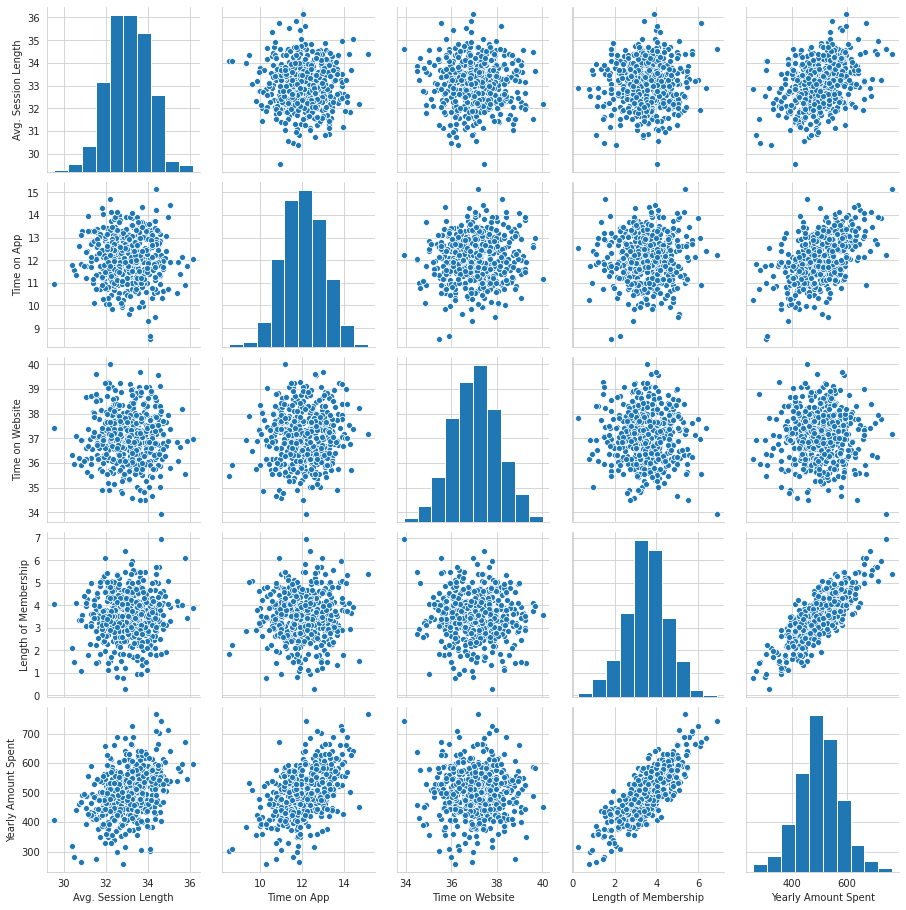

In [ ]:
sns.pairplot(customers);

From the pairplot above we can observe that the length of membership is most closely related to the yearly amount spent by the consumers.

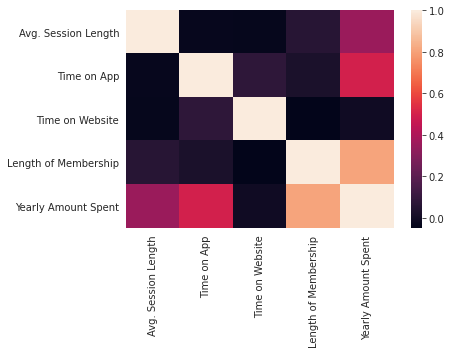

In [ ]:
sns.heatmap(data=customers.corr());

## Multiple Linear Regression

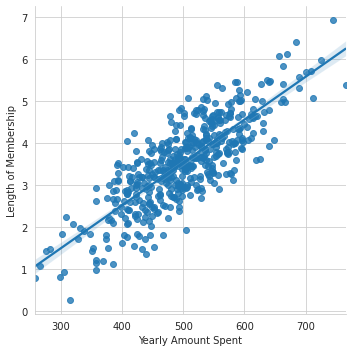

In [ ]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=customers);

Let's split the data into training and testing set. We will set $y$ as the Yearly Amount Spent and $X$ will be the numerical features related to the customers from the data.

In [ ]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)

Coefficients: [25.98154972 38.59015875  0.19040528 61.27909654]
Intercept: -1047.932782250239


In [ ]:
coeffecients = pd.DataFrame(lm.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Now that we have our fit model, let's see how well we can predict the test values.

Also, let's create a scatter plot of real test values vs the predicted values.

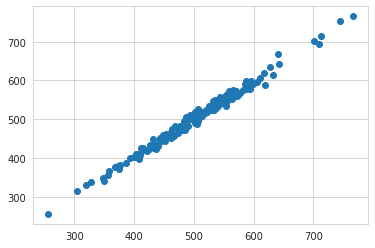

In [ ]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions);

Now we evaluate the model.

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.2281486534308295
MSE: 79.8130516509743
RMSE: 8.933815066978626


In [ ]:
print('Explained Variance Regression Score:', metrics.explained_variance_score(y_test, predictions), '\nBest possible score is 1.0, lower values are worse.')

Explained Variance Regression Score: 0.9890771231889607 
Best possible score is 1.0, lower values are worse.


Now that we have a good model, Let's explore the residuals.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn `distplot`, or just `plt.hist()`.

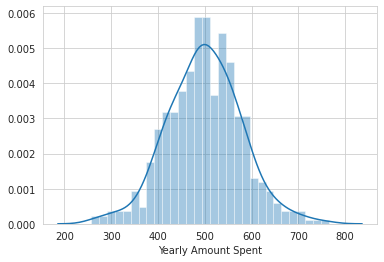

In [ ]:
sns.distplot(customers['Yearly Amount Spent'], bins=30);

The distribution is normal.

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
lm1 = smf.ols(formula='Q("Yearly Amount Spent") ~ Q("Avg. Session Length") + Q("Time on App") + Q("Time on Website") + Q("Length of Membership")', data=customers).fit()

In [ ]:
lm1.params

Intercept                   -1051.594255
Q("Avg. Session Length")       25.734271
Q("Time on App")               38.709154
Q("Time on Website")            0.436739
Q("Length of Membership")      61.577324
dtype: float64

In [ ]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Q("Yearly Amount Spent")   R-squared:                       0.984
Model:                                  OLS   Adj. R-squared:                  0.984
Method:                       Least Squares   F-statistic:                     7766.
Date:                      Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                              15:00:49   Log-Likelihood:                -1856.9
No. Observations:                       500   AIC:                             3724.
Df Residuals:                           495   BIC:                             3745.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Q("Avg. Session Length")     25.7343      0.451     57.057      0.000      24.848      26.620
Q("Time on App")             38.7092      0.451     85.828      0.000      37.823      39.595
Q("Time on Website")          0.4367      0.444      0.983      0.326      -0.436       1.309
Q("Length of Membership")    61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## $k$-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, validation_curve
from sklearn.metrics import make_scorer

In [ ]:
scores = cross_val_score(lm, X_train, y_train, cv=5, scoring=make_scorer(metrics.mean_squared_error))
scores.mean()

111.22824506626712

## Conclusions

*   We can interpret this data to make certain observations, for example, If all other factors are kept constant then increasing the "*Avg. Session Length*" by one unit will increase the yearly amount spent by a customer by an estimate of **\$$26$**.

*   Similarly increasing "*Time on App*" by one unit increases yearly amount spent by **\$$38.5$** whereas, increasing Time on Website by one unit increases yearly amount spent by only **\$$0.6$** approximately.

*   According to the data above the largest increase of approximately **\$$61.5$** is observed when the "*Length of Membership*" is increased by one unit.

Using the predictions above we can develop ways in order to increase yearly amount spent by the customers:

We can improve the app experience so that the users spend more of their time on the app or we can also focus on the website and develop it so that it becomes as efficient as the app or we can focus on customer relationship so that people remain members for long periods of time. From here, the business could focus on keeping, maintaining, and cultivating long term members.

Additionally, the business should weigh other factors on determining whether to focus on developing the app further since it is making good money or developing the website further in order to get it closer to the other categories.



# Arrhythmia

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
arrhythmia = pd.read_csv('/content/arrhythmia.data', header=None)

In [ ]:
arrhythmia.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


## Data Preprocessing

### Missing Values

In [ ]:
# Let's see how many missing data we have and replace them with NaN's
count = 0
for i in range(0,452):
    for j in range(0,280):
        if (arrhythmia.iloc[i,j] == '?'):
            count = count + 1

print('Number of total missing data:', count)

arrhythmia = arrhythmia.replace('?', np.NaN)

Number of total missing data: 408


Text(0, 0.5, 'Count of NaN')

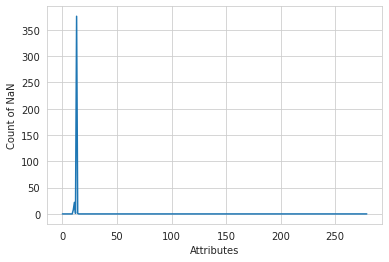

In [ ]:
# The distribution of missing data
pd.isnull(arrhythmia).sum().plot()
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

Text(0, 0.5, 'Count of NaN')

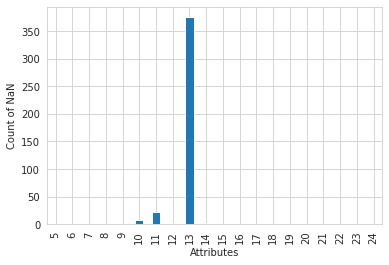

In [ ]:
# A closer look at missing data distribution
pd.isnull(arrhythmia).sum()[5:25].plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

We shall drop column 13 since most of it is missing.

In [ ]:
# Dropping column 13
arrhythmia.drop(columns=13, inplace=True)

Using Imputer to replace/fill other missing values.
Then create a new DataFrame with our preprocessed data.

Please note that *$k$-nearest neighbors algorithm* is also applied to the dataset for NaN replacement.

In [ ]:
import fancyimpute
arrhythmia_no_missing = pd.DataFrame(fancyimpute.KNN(k=10).fit_transform(arrhythmia))

Using TensorFlow backend.


Imputing row 1/452 with 0 missing, elapsed time: 0.250
Imputing row 101/452 with 0 missing, elapsed time: 0.251
Imputing row 201/452 with 1 missing, elapsed time: 0.251
Imputing row 301/452 with 1 missing, elapsed time: 0.252
Imputing row 401/452 with 0 missing, elapsed time: 0.253


In [ ]:
arrhythmia_no_missing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,13.0,64.0,-2.0,63.000000,0.0,52.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,20.0,36.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,40.0,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,37.0,-17.0,31.0,53.000000,0.0,48.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,24.0,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,34.0,70.0,66.0,75.000000,0.0,40.0,80.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,56.0,52.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,116.0,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,11.0,-5.0,20.0,71.000000,0.0,72.0,20.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,36.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,52.0,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,13.0,61.0,3.0,73.402838,0.0,48.0,40.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,24.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,36.0,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


Labeling the columns and restructering the DataFrame.



In [ ]:
# Adding column names
X_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279"]

# Dropping the y column from X
X = arrhythmia_no_missing.drop(columns=278)

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,13.0,64.0,-2.0,63.000000,0.0,52.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,20.0,36.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,40.0,...,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,37.0,-17.0,31.0,53.000000,0.0,48.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,24.0,...,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,34.0,70.0,66.0,75.000000,0.0,40.0,80.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,56.0,52.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,116.0,...,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,11.0,-5.0,20.0,71.000000,0.0,72.0,20.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,36.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,52.0,...,0.7,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,13.0,61.0,3.0,73.402838,0.0,48.0,40.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,24.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,36.0,...,-0.5,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


Putting the labels (column names) at their desired position.

In [ ]:
X.columns = X_columns

In [ ]:
X.head().transpose()

,0,1,2,3,4
Age,75.0,56.0,54.0,55.0,75.0
Sex,0.0,1.0,0.0,0.0,0.0
Height,190.0,165.0,172.0,175.0,190.0
Weight,80.0,64.0,95.0,94.0,80.0
QRS_Dur,91.0,81.0,138.0,100.0,88.0
...,...,...,...,...,...
V6275,0.0,0.0,0.0,0.0,0.0
V6276,0.9,0.2,0.3,0.4,-0.1
V6277,2.9,2.1,3.4,2.6,3.9
V6278,23.3,20.4,12.3,34.6,25.4


Assigning values to the entries of **matrix $y$**.

In [ ]:
y = arrhythmia[[279]]

In [ ]:
y.head()

,279
0,8
1,6
2,10
3,1
4,7


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [ ]:
y = pd.DataFrame(lb.fit_transform(y), columns=lb.classes_)

In [ ]:
y.head()

,1,2,3,4,5,6,7,8,9,10,14,15,16
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0


### Outliers

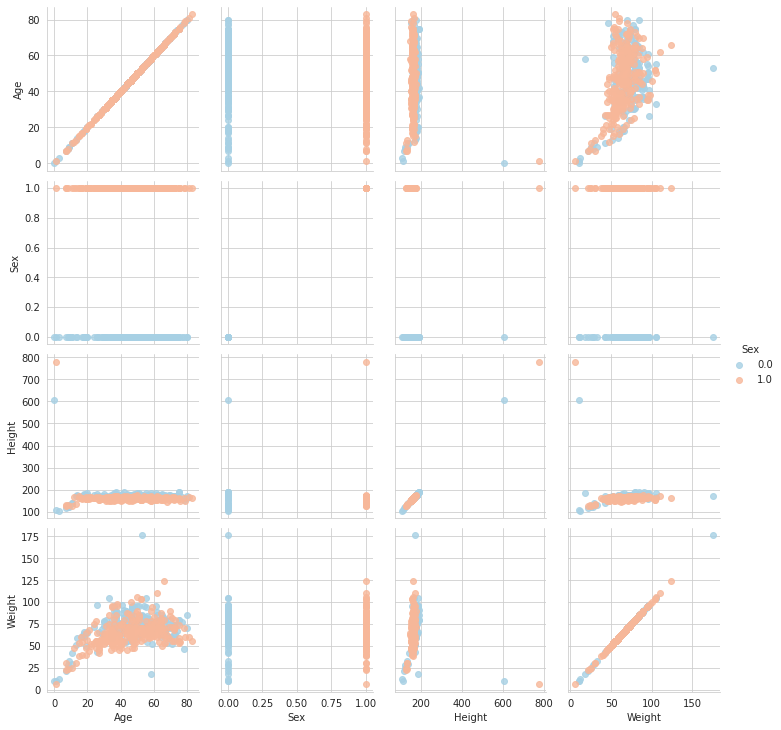

In [ ]:
g_plot = sns.PairGrid(X, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g_plot.map(plt.scatter, alpha=0.8)
g_plot.add_legend();

According to scatter plots, there are few outliers in '*height*' and '*weight*' attributes. We'll check the maximums of heights and weights.

In [ ]:
sorted(X['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

The tallest person ever lived in the world was $272$ **cm** (*1940*). His followers were $267$ **cm** (*1905*) and $263.5$ **cm** (*1969*).

Replacing $780$ and $608$ with $108$ and $180$ **cm**.

In [ ]:
X['Height'] = X['Height'].replace(608, 108)
X['Height'] = X['Height'].replace(780, 180)

In [ ]:
sorted(X['Height'], reverse=True)[:10]

[190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0, 185.0, 185.0]

Looks like $176$ **kgs** is a possible weight. We'll keep them.

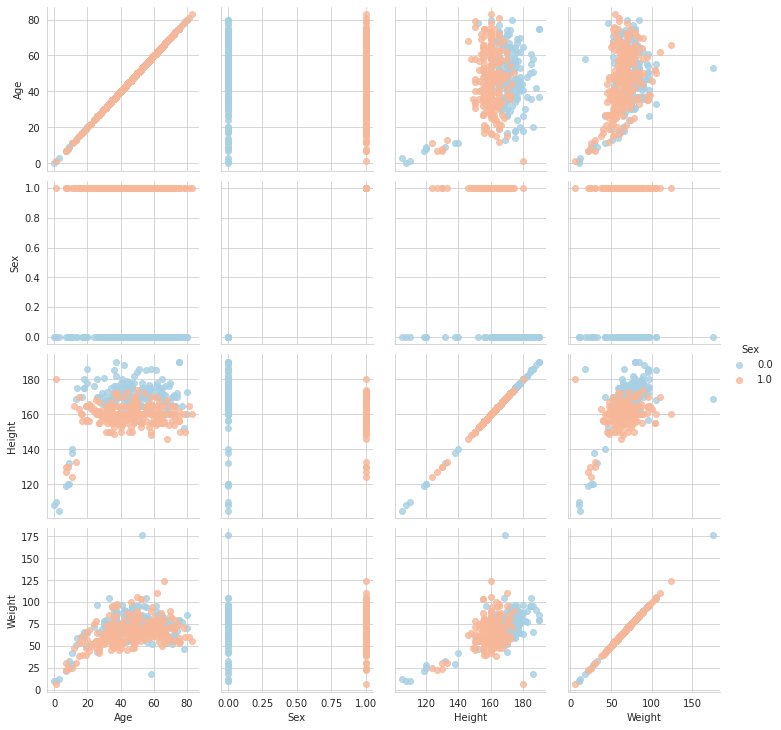

In [ ]:
g = sns.PairGrid(X, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

## $k$-nearest neighbors

#### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, multilabel_confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

#### $k = 1$

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_prediction = knn.predict(X_test)

In [ ]:
print('Confusion Matrix:\n')
print(multilabel_confusion_matrix(y_test, y_prediction))
for mat in multilabel_confusion_matrix(y_test, y_prediction):
  print('\nTP: ', mat[0][0])
  print('TN: ', mat[0][1])
  print('FP: ', mat[1][0])
  print('FN: ', mat[1][1])
  print('Sensitivity: ', mat[0][0] / (mat[0][0] + mat[1][1]))
  print('Specificity: ', mat[0][1] / (mat[0][1] + mat[1][0]))
print('\nClassification Report:\n')
print(classification_report(y_test, y_prediction))

Confusion Matrix:

[[[ 32  29]
  [ 16  59]]

 [[116   5]
  [ 14   1]]

 [[131   1]
  [  1   3]]

 [[130   2]
  [  1   3]]

 [[126   5]
  [  5   0]]

 [[119   7]
  [  8   2]]

 [[135   0]
  [  1   0]]

 [[135   1]
  [  0   0]]

 [[133   0]
  [  0   3]]

 [[115  10]
  [  8   3]]

 [[136   0]
  [  0   0]]

 [[135   0]
  [  1   0]]

 [[127   2]
  [  7   0]]]

TP:  32
TN:  29
FP:  16
FN:  59
Sensitivity:  0.3516483516483517
Specificity:  0.6444444444444445

TP:  116
TN:  5
FP:  14
FN:  1
Sensitivity:  0.9914529914529915
Specificity:  0.2631578947368421

TP:  131
TN:  1
FP:  1
FN:  3
Sensitivity:  0.9776119402985075
Specificity:  0.5

TP:  130
TN:  2
FP:  1
FN:  3
Sensitivity:  0.9774436090225563
Specificity:  0.6666666666666666

TP:  126
TN:  5
FP:  5
FN:  0
Sensitivity:  1.0
Specificity:  0.5

TP:  119
TN:  7
FP:  8
FN:  2
Sensitivity:  0.9834710743801653
Specificity:  0.4666666666666667

TP:  135
TN:  0
FP:  1
FN:  0
Sensitivity:  1.0
Specificity:  0.0

TP:  135
TN:  1
FP:  0
FN:  0
Sensi

#### $k = 30$

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_prediction = knn.predict(X_test)

In [ ]:
print('Confusion Matrix:\n')
print(multilabel_confusion_matrix(y_test, y_prediction))
for mat in multilabel_confusion_matrix(y_test, y_prediction):
  print('\nTP: ', mat[0][0])
  print('TN: ', mat[0][1])
  print('FP: ', mat[1][0])
  print('FN: ', mat[1][1])
  print('Sensitivity: ', mat[0][0] / (mat[0][0] + mat[1][1]))
  print('Specificity: ', mat[0][1] / (mat[0][1] + mat[1][0]))
print('\nClassification Report:\n')
print(classification_report(y_test, y_prediction))

Confusion Matrix:

[[[  8  53]
  [  1  74]]

 [[121   0]
  [ 15   0]]

 [[132   0]
  [  4   0]]

 [[132   0]
  [  4   0]]

 [[131   0]
  [  5   0]]

 [[126   0]
  [ 10   0]]

 [[135   0]
  [  1   0]]

 [[136   0]
  [  0   0]]

 [[133   0]
  [  3   0]]

 [[125   0]
  [ 11   0]]

 [[136   0]
  [  0   0]]

 [[135   0]
  [  1   0]]

 [[129   0]
  [  7   0]]]

TP:  8
TN:  53
FP:  1
FN:  74
Sensitivity:  0.0975609756097561
Specificity:  0.9814814814814815

TP:  121
TN:  0
FP:  15
FN:  0
Sensitivity:  1.0
Specificity:  0.0

TP:  132
TN:  0
FP:  4
FN:  0
Sensitivity:  1.0
Specificity:  0.0

TP:  132
TN:  0
FP:  4
FN:  0
Sensitivity:  1.0
Specificity:  0.0

TP:  131
TN:  0
FP:  5
FN:  0
Sensitivity:  1.0
Specificity:  0.0

TP:  126
TN:  0
FP:  10
FN:  0
Sensitivity:  1.0
Specificity:  0.0

TP:  135
TN:  0
FP:  1
FN:  0
Sensitivity:  1.0
Specificity:  0.0

TP:  136
TN:  0
FP:  0
FN:  0
Sensitivity:  1.0
Specificity:  nan

TP:  133
TN:  0
FP:  3
FN:  0
Sensitivity:  1.0
Specificity:  0.0

TP:  12

To report **Receiver Operating Characteristic (*ROC*)**, we first have to binarize the data into sick & healthy:

*   **Sick:** Classes $2$ to $15$ correspond to different types of arrhythmia. For the purpose of safety of the patient, we'll classify ***unlabeled patients*** as sick to reduce the risk of death. *(Also, for the sake of simplicity!)*
*   **Healthy:** Class $1$ corresponds to normal ECG with no arrhythmia.
___
*The classification is based on dataset description given below:*
> The data set is labeled with 16 different classes. Classes 2 to 15 correspond to different types of arrhythmia. Class 1 corresponds to normal ECG with no arrhythmia and class 16 refers to unlabeled patient.

## $k$-fold cross validation

In [ ]:
from sklearn.metrics import make_scorer, recall_score

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors': list(range(1,51)), 'metric': ['euclidean', 'manhattan', 'cosine']}

In [ ]:
grid = GridSearchCV(knn, param_grid, verbose=5, cv=10, scoring=make_scorer(recall_score, average='macro'))

In [ ]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.168, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.178, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.392, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.064, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.303, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.165, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ..... metric=euclidean, n_neighbors=1, score=0.388, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.222, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.164, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.240, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.115, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.109, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.166, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   46.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(recall_score, average=macro), verbose=5)

#### Optimal Parameters

In [ ]:
grid.best_params_

{'metric': 'cosine', 'n_neighbors': 1}

In [ ]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')